# FBB watch PEP8 compliance: spaces around operators  (e.g. "allmales = {" instead of allmales={ ). The coding is generally good otherwise


# FBB You must explain what you are doing, and the results that you get! you should remove my instruction cells: this should be your notebook, with your description of the exercise as a header, and your code and description of the code, and plots, and explaining why you do what you do

#  you MUST label, give titles, and decribe with captions your figure to show that you are understanding what you are doing, and to allow the reader to understand the notebook without having to read the code. You loose a lot of points in the HW for this and if it were the midterm you would have lost a lot as well! I cannot know that you know what you are doing if you do not use your words to describe what the outputs are.


# In the conclusions you are just describing the data, and missing the important aspect of how it affects the analysis.


## GENDER INCOME GAP

you may know that it is estimated that women earn about 78% of men in the same job position. 
Can we test that on NYC income data? Can we turn that into a prediction: if you get hired at a certain stipend as a men, what should you expect to make as a woman? (or from the point of view of a job employer, perhaps not one with a very strong moral compass, what should I offer to a woman job candidate, given what I would offer a man for the same job?)




In [2]:
from __future__ import print_function, division
import sys
import os
import numpy 
import pylab as pl
import pandas as pd

import json
import os
%pylab inline

Populating the interactive namespace from numpy and matplotlib


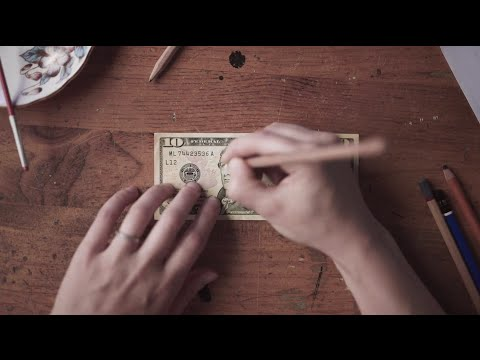

In [3]:
#The gender gap(non mandatory viewing)
from IPython.display import YouTubeVideo
YouTubeVideo("G_ikzQM93W8")

the Census data on income
http://www.census.gov/hhes/www/cpstables/032015/perinc/pinc03_000.htm

I posted the relevant data on the class webpage here : http://cosmo.nyu.edu/~fb55/PUI2016/data

# 1. Create two python dictionaries to store your data. 
```
     allmales = ... 
```
stores the male data
```
    allfemales = ...
```
stores the female data
     
each dictionary needs to have 5 key-pair values with keys:
'all', 'white', 'black', 'hispanic', 'asian'
each value should contain a dataframe read with the pandas read_excel function directly from the url. 

should contain



In [4]:
# to use the url just pass it to pandas read_excell
url = "http://cosmo.nyu.edu/~fb55/PUI2016/data/"

In [62]:
allmales={"all":nan,"white":nan,"black":nan,"asian":nan,"hispanic":nan}
allfemales={"all":nan,"white":nan,"black":nan,"asian":nan,"hispanic":nan}

In [63]:
key=['all','white','black','asian','hispanic']
j=0
for i in ['1_1',"1_4","1_6","1_8","1_9"]:
    file=url+"pinc08_2_"+i+".xls"
    allmales[key[j]]=pd.read_excel(file,header=9)
    allmales[key[j]]
    j+=1

In [64]:
key=['all','white','black','asian','hispanic']
j=0
for i in ['1_1',"1_4","1_6","1_8","1_9"]:
    file=url+"pinc08_3_"+i+".xls"
    allfemales[key[j]]=pd.read_excel(file,header=9)
    allfemales[key[j]]
    j+=1

In [65]:
#allfemales and allmales should be dictionaries
type(allfemales)

dict

In [66]:
allfemales['all'].head()

,Characteristic,Total with Income,"$1 to $2,499 or loss","$2,500 to $4,999","$5,000 to $7,499","$7,500 to $9,999","$10,000 to $12,499","$12,500 to $14,999","$15,000 to $17,499","$17,500 to $19,999",...,"$92,500 to $94,999","$95,000 to $97,499","$97,500 to $99,999","$100,000 and over",Median income,Unnamed: 44,Mean income,Unnamed: 46,Gini ratio,Unnamed: 48
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Value\n(Dol.),Standard\nerror (Dol.),Value\n(Dol.),Standard\nerror (Dol.),Ratio,Standard\nerror
1,....Total,109956.0,7590.0,4298.0,5557.0,7874.0,8052.0,5720.0,6768.0,4377.0,...,167.0,285.0,184.0,4442.0,22063,137,31968,250,0.495,0.0025
2,Earnings,74545.0,4198.0,3118.0,3269.0,2662.0,4579.0,1994.0,4134.0,2585.0,...,60.0,236.0,127.0,3535.0,27736,364,36189,307,0.466,0.0032
3,..Wages and Salary,71220.0,3835.0,2954.0,3005.0,2411.0,4309.0,1941.0,3908.0,2484.0,...,61.0,233.0,126.0,3370.0,28402,379,36412,316,0.461,0.0032
4,..Nonfarm Self-Employment,4694.0,1282.0,288.0,410.0,253.0,388.0,84.0,265.0,126.0,...,0.0,0.0,0.0,127.0,10732,399,20942,1123,0.65,0.0162


In [67]:
# the files are a bit of a mess! 
allfemales['all'].columns

Index([      u'Characteristic',    u'Total with Income',
       u'$1 to $2,499 or loss',     u'$2,500 to $4,999',
           u'$5,000 to $7,499',     u'$7,500 to $9,999',
         u'$10,000 to $12,499',   u'$12,500 to $14,999',
         u'$15,000 to $17,499',   u'$17,500 to $19,999',
         u'$20,000 to $22,499',   u'$22,500 to $24,999',
         u'$25,000 to $27,499',   u'$27,500 to $29,999',
         u'$30,000 to $32,499',   u'$32,500 to $34,999',
         u'$35,000 to $37,499',   u'$37,500 to $39,999',
         u'$40,000 to $42,499',   u'$42,500 to $44,999',
         u'$45,000 to $47,499',   u'$47,500 to $49,999',
         u'$50,000 to $52,499',   u'$52,500 to $54,999',
         u'$55,000 to $57,499',   u'$57,500 to $59,999',
         u'$60,000 to $62,499',   u'$62,500 to $64,999',
         u'$65,000 to $67,499',   u'$67,500 to $69,999',
         u'$70,000 to $72,499',   u'$72,500 to $74,999',
         u'$75,000 to $77,499',   u'$77,500 to $79,999',
         u'$80,000 to $82,499',

# Descriptive phase: 


In [68]:
# just run this cell to get an idea of the data
for k,v in allfemales.items():
    print("#####", k)
    print(v.describe())
for k,v in allmales.items():
    print("#####", k)
    print(v.describe())

##### hispanic
       Total with Income  $1 to $2,499 or loss  $2,500 to $4,999  \
count          46.000000             46.000000         46.000000   
mean         1908.739130            274.282609        137.717391   
std          3688.718088            568.547923        199.157298   
min             1.000000              0.000000          0.000000   
25%                  NaN                   NaN               NaN   
50%                  NaN                   NaN               NaN   
75%                  NaN                   NaN               NaN   
max         14034.000000           2704.000000        783.000000   

       $5,000 to $7,499  $7,500 to $9,999  $10,000 to $12,499  \
count         46.000000         46.000000           46.000000   
mean         154.043478        188.913043          175.173913   
std          259.111813        321.948569          341.577016   
min            0.000000          0.000000            0.000000   
25%                 NaN               NaN      

//anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


       Total with Income  $1 to $2,499 or loss  $2,500 to $4,999  \
count          46.000000             46.000000         46.000000   
mean         2120.260870            292.304348        141.021739   
std          3673.947011            563.958859        181.001595   
min             0.000000              0.000000          0.000000   
25%                  NaN                   NaN               NaN   
50%                  NaN                   NaN               NaN   
75%                  NaN                   NaN               NaN   
max         14346.000000           2727.000000        679.000000   

       $5,000 to $7,499  $7,500 to $9,999  $10,000 to $12,499  \
count         46.000000         46.000000           46.000000   
mean         140.934783        229.456522          179.021739   
std          203.026917        371.274843          321.057730   
min            0.000000          0.000000            0.000000   
25%                 NaN               NaN                 NaN 

# 2. Exploratory phase
## at this point it is a good idea to see if we can plot some data.
## pandas has a nifty function scatter_matrix which plots every numerical column against the other. 
## however there are a lot of non-real values in these DataFrames so running pd.scatter_matrix(allmales['asian']) for example would fail. You can try!

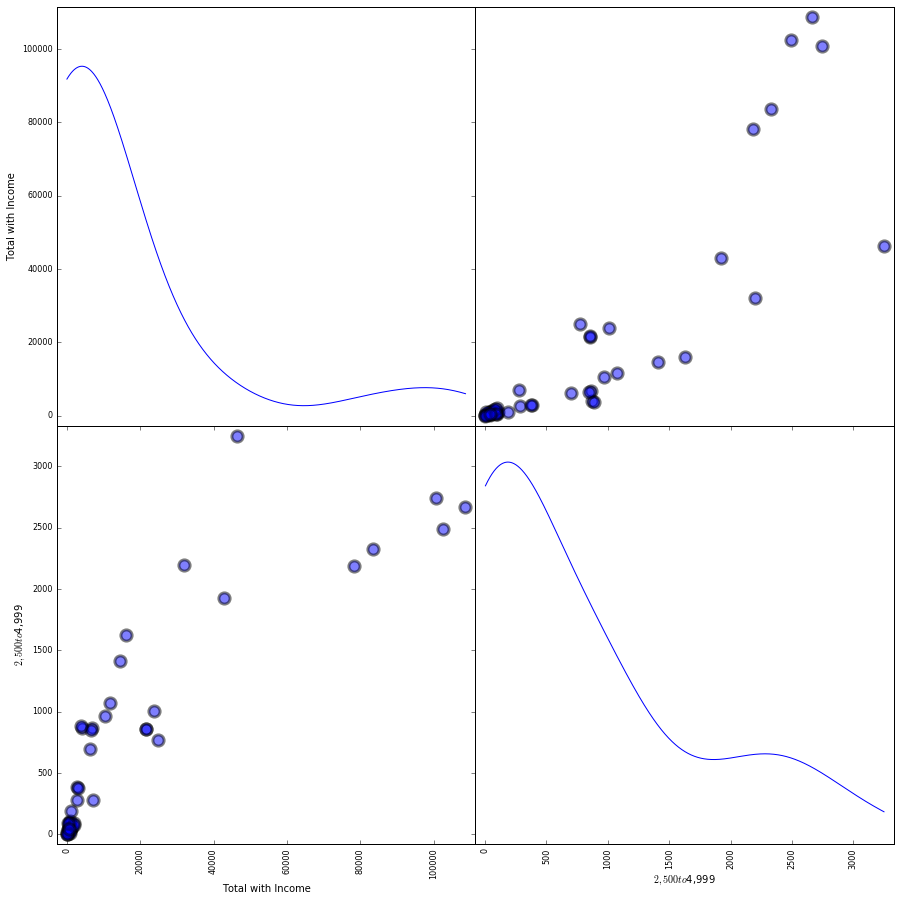

In [69]:
# only columns containing real numerical values 
# are plotted with scatter_matrix. 
# But we are interested in median income but it wont get plotted, 
# due to bad values in the column

fig = pd.scatter_matrix(allmales['all']
                   [[u'Total with Income',u'$2,500 to $4,999',
                     u'Median income',u'Gini ratio']],
                   linewidth= 3, s=500, figsize=(15,15), 
                        diagonal='kde')                

# FBB missing figure caption

In [71]:
allmales['asian']

,Characteristic,Total with Income,"$1 to $2,499 or loss","$2,500 to $4,999","$5,000 to $7,499","$7,500 to $9,999","$10,000 to $12,499","$12,500 to $14,999","$15,000 to $17,499","$17,500 to $19,999",...,"$92,500 to $94,999","$95,000 to $97,499","$97,500 to $99,999","$100,000 and over",Median income,Unnamed: 44,Mean income,Unnamed: 46,Gini ratio,Unnamed: 48
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Value\n(Dol.),Standard\nerror (Dol.),Value\n(Dol.),Standard\nerror (Dol.),Ratio,Standard\nerror
1,....Total,5752.0,230.0,146.0,227.0,195.0,216.0,193.0,225.0,218.0,...,32.0,40.0,23.0,904.0,40153,1469,58236,1786,0.519,0.011
2,Earnings,4716.0,137.0,135.0,132.0,82.0,136.0,109.0,157.0,122.0,...,28.0,28.0,21.0,843.0,45926,1619,63799,2008,0.49,0.0119
3,..Wages and Salary,4482.0,126.0,124.0,129.0,83.0,127.0,104.0,145.0,113.0,...,28.0,28.0,20.0,819.0,45950,1927,64304,2042,0.49,0.0124
4,..Nonfarm Self-Employment,303.0,58.0,13.0,11.0,2.0,12.0,4.0,16.0,5.0,...,0.0,0.0,0.0,24.0,30916,5465,41394,6079,0.571,0.0433
5,..Farm Self-Employment,43.0,32.0,0.0,4.0,0.0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,(B),(B),(B),(B),(B),(B)
6,Social Security,659.0,6.0,31.0,44.0,77.0,102.0,63.0,93.0,89.0,...,0.0,0.0,0.0,0.0,15120,735,15189,471,0.253,0.012
7,SSI (Supplemental Security Income),106.0,1.0,13.0,20.0,44.0,9.0,8.0,0.0,4.0,...,0.0,0.0,0.0,0.0,8598,412,9481,796,0.26,0.0314
8,Public Assistance,29.0,13.0,9.0,6.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,(B),(B),(B),(B),(B),(B)
9,Veterans Benefits,93.0,19.0,17.0,8.0,10.0,8.0,7.0,2.0,8.0,...,0.0,0.0,0.0,0.0,7868,2244,9835,1218,0.449,0.0429


In [70]:
#the rel values in the Median income row are fewer than the number of rows
print (allmales['asian'].shape)
allmales['asian'].applymap(np.isreal).sum()    #applymap is to apply a function to dataframe

(49, 49)


Characteristic           1
Total with Income       49
$1 to $2,499 or loss    49
$2,500 to $4,999        49
$5,000 to $7,499        49
$7,500 to $9,999        49
$10,000 to $12,499      49
$12,500 to $14,999      49
$15,000 to $17,499      49
$17,500 to $19,999      49
$20,000 to $22,499      49
$22,500 to $24,999      49
$25,000 to $27,499      49
$27,500 to $29,999      49
$30,000 to $32,499      49
$32,500 to $34,999      49
$35,000 to $37,499      49
$37,500 to $39,999      49
$40,000 to $42,499      49
$42,500 to $44,999      49
$45,000 to $47,499      49
$47,500 to $49,999      49
$50,000 to $52,499      49
$52,500 to $54,999      49
$55,000 to $57,499      49
$57,500 to $59,999      49
$60,000 to $62,499      49
$62,500 to $64,999      49
$65,000 to $67,499      49
$67,500 to $69,999      49
$70,000 to $72,499      49
$72,500 to $74,999      49
$75,000 to $77,499      49
$77,500 to $79,999      49
$80,000 to $82,499      49
$82,500 to $84,999      49
$85,000 to $87,499      49
$

In [72]:
# there are a lot of non-real values that make the analysis hard.
# the ugly loops below will help you clean up 
# CHALLENGE: can you do better and to it in a more pythonic way 
#            without using loops? 
#NOTE: this only will work if the data is store how I suggested. 
# you are welcome to find your own solution though.

for gender in [allmales, allfemales]:
    for k in gender:
        # find non real values in the dataframe with applymap
        isreal  = gender[k].applymap(np.isreal)
        for c in gender[k].columns :
            #i f some but not all values in column are real
            #replace the non real ones
            if isreal.sum()[c] > 0 and \
            isreal.sum()[c] < gender[k].shape[0]:
                gender[k][c][~isreal[c]] =  np.nan
                gender[k][c] = gender[k][c].astype(float)
                


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


# now you can plot the dataframe values with a scatter plot 
 just like I tried to do above
 please plot is and write a DESCRIPTIVE caption for the plot in a cell below it

### ALLMALES

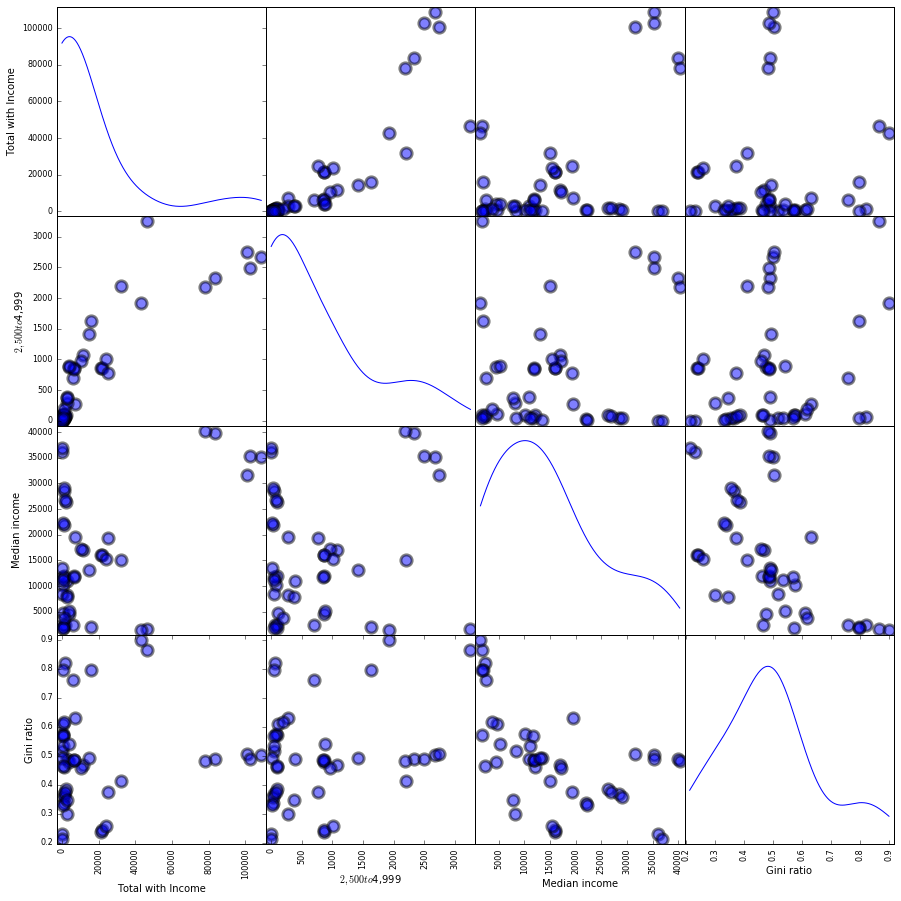

In [88]:
fig = pd.scatter_matrix(allmales['all']
                   [[u'Total with Income',u'$2,500 to $4,999',      
                     u'Median income',u'Gini ratio']],
                   linewidth= 3, s=500, figsize=(15,15), 
                        diagonal='kde')  

# FBB missing figure caption


### ALLFEMALES

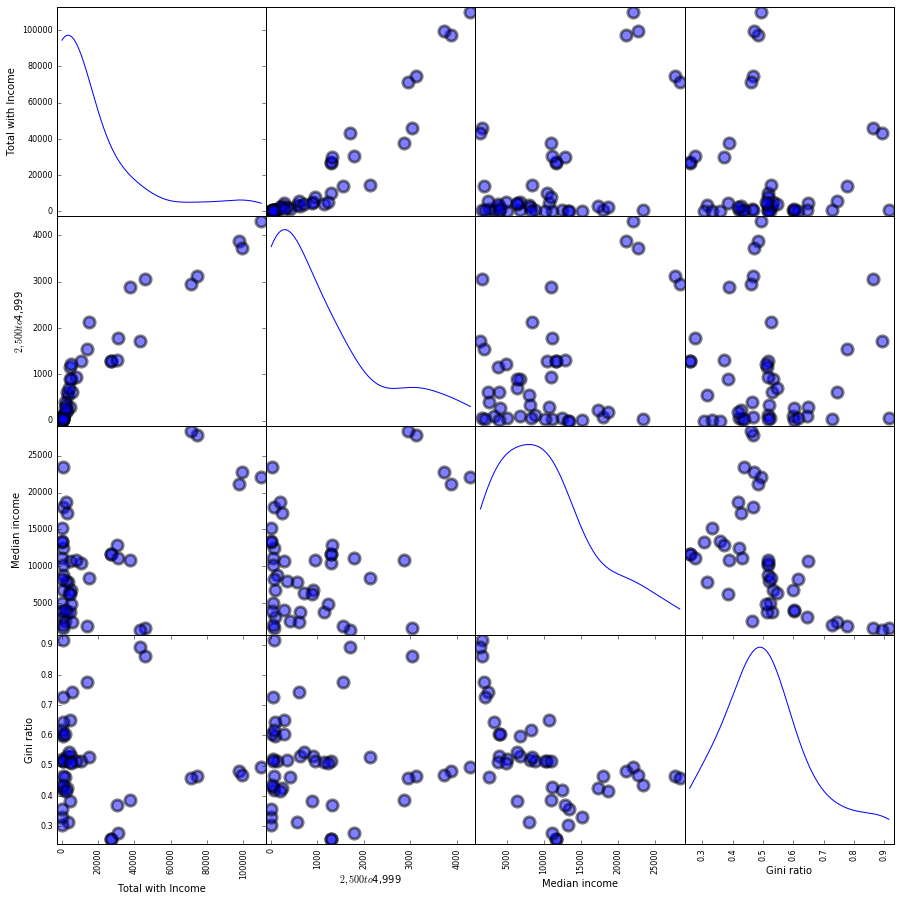

In [91]:
fig = pd.scatter_matrix(allfemales['all']
                   [[u'Total with Income',u'$2,500 to $4,999',      
                     u'Median income',u'Gini ratio']],
                   linewidth= 3, s=500, figsize=(15,15), 
                        diagonal='kde')  

# FBB missing figure caption


##  

## 3. to see how the male and female income relate to each other plot the Total Median Income (from any source of revenue) of females vs the Total Median Income of males, race by race (one data point per race)

## also plot the 1-1 line: the diagonal that corresponds to men and women getting the same pay

(make the plot and describe it in a "caption" in the cell below the plot)

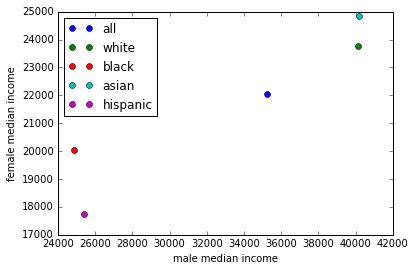

In [129]:
##plotting the Total median incame by race
##pl.scatter...
for k in key:    
    pl.plot(allmales[k].loc[1,'Median income'],allfemales[k].loc[1,'Median income'],'o')
pl.xlabel('male median income')
pl.ylabel('female median income')
pl.legend(['all','white','black','asian','hispanic'],loc='best')

# FBB missing figure caption

# If you want to show inequality here use a squared plot, so the 45degree line can easily identified as the equality line and slopes intuitively compared to it. Like you did in the last figure

# 4. Now fit the data with a line.
### you can use statsmodels, or scipy, numpy, or create your own residual minimization function. 
### Below are steps on how to do this with numpy. Statsmodels requires fewer steps, and you are welcome to use that package. Numpy is less of a black box, so you would learn more taking yourself through the exercise. but you will be graded on the succesful fit, however you choose to perform it.

In [132]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [191]:
x=[]
y=[]
for k in key:
    x.append(allmales[k].loc[1,'Median income'])
    y.append(allfemales[k].loc[1,'Median income'])
x,y

([35228.0, 40122.0, 24855.0, 40153.0, 25411.0],
 [22063.0, 23780.0, 20044.0, 24840.0, 17762.0])

In [214]:
new=pd.DataFrame(x,y)
new

,0
22063.0,35228.0
23780.0,40122.0
20044.0,24855.0
24840.0,40153.0
17762.0,25411.0


In [217]:
#method 1 to predict
predict=smf.ols(formula = 'y ~ x', data = new).fit()
predict.params

Intercept    9989.844408
x               0.353141
dtype: float64

In [185]:
#method 2 to predict
x_new=sm.add_constant(x)
x_new

array([[  1.00000000e+00,   3.52280000e+04],
       [  1.00000000e+00,   4.01220000e+04],
       [  1.00000000e+00,   2.48550000e+04],
       [  1.00000000e+00,   4.01530000e+04],
       [  1.00000000e+00,   2.54110000e+04]])

In [183]:
#method 2
params = np.polyfit(x, y, 1)
params

array([  3.53140683e-01,   9.98984441e+03])

In [219]:
#method 3

In [204]:
new=pd.DataFrame(x_new)
new['y']=y
new

,0,1,y
0,1.0,35228.0,22063.0
1,1.0,40122.0,23780.0
2,1.0,24855.0,20044.0
3,1.0,40153.0,24840.0
4,1.0,25411.0,17762.0


In [ ]:
regress = sm.OLS(y, x_new)
modelfit = regress.fit()

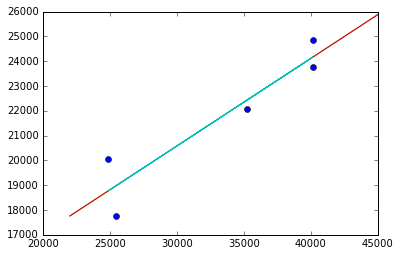

In [220]:
x_n=np.arange(22000,45000,1)
pl.plot(x,y,'o')
pl.plot(x_n, predict.params[1]*x_n+predict.params[0])   #method 1 statsmodels.formula.ols
pl.plot(x_n, params[0]*x_n + params[1])                 #method 2 np.polyfit
pl.plot(x_new[:,1], modelfit.predict(x_new))            #mothod 3 sm.ols

# FBB missing figure caption

## there is an analytical solution for the OLS (ordinary least square) regression which is coded below. please try to read the code and understand the formula! 


In [190]:
#this is the analytical best regression line. 
# it can be proved (ask me about it if you want!)
# run the cell below to get the beta0 and beta1 values
from scipy import stats
all_males=np.array([0., allmales['all']['Median income'][1],
                    allmales['white']['Median income'][1],
                    allmales['black']['Median income'][1],
                     allmales['hispanic']['Median income'][1],
                    allmales['asian']['Median income'][1]])

all_females=np.array([0.] + [allfemales[k]['Median income'][1] \
                             for k in ['all', 'white', 'black',
                                     'hispanic','asian']])
cor = stats.spearmanr(all_males, all_females)
beta1 = cor[0] * all_females.std() / all_males.std()
beta0 = all_females.mean() - beta1 * all_males.mean()
beta0, beta1

(2224.3609760454674, 0.57394829035421091)

## remake the scatter plot, with your line fit as well as the analytical solution to compare that with the result of your numerical one (remember: a line is y = beta0 + beta1 * x)

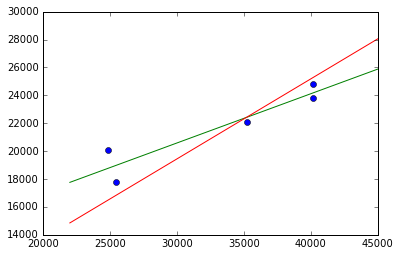

In [222]:
x_n=np.arange(22000,45000,1)
pl.plot(x,y,'o')
pl.plot(x_n, predict.params[1]*x_n+predict.params[0],'g-')   #method 1 statsmodels.formula.ols
pl.plot(x_n,beta0+beta1*x_n,'r-')

# FBB missing figure caption


# 5. this was done with THE TOTAL MEDIAN INCOME, let's now see if all forms of income lead to a different fit. 

In [223]:
all_males_allincomes = np.array(
    np.concatenate([allmales['all']['Median income'][:].values,
                    allmales['white']['Median income'][:].values,
                    allmales['black']['Median income'][:].values,
                    allmales['hispanic']['Median income'][:].values,
                    allmales['asian']['Median income'][:].values]).flatten())
#with a list comprehension syntax, but the result i the same as above
all_females_allincomes = np.array(
    np.concatenate([allfemales[k]['Median income'][:].values \
                    for k in ['all',
                                   'white', 'black', 
                                    'hispanic', 'asian']]).flatten())

#IDepending on what you use to fit you may need to remove NaN values 
#I am gonna create the mask in the next line. 
#the mask is False where either male or female value is NaN. 
#Notice that True is really just >1, and False really 0. 
#so i can add the male and female mask and the resulting mask will be 
#False where both arrays are not Nan, and true otherwise. 

mask = ~(np.isnan(all_males_allincomes) + np.isnan(all_females_allincomes))
# now you can use mask as an index (broadcasting) to select the non NaN values

In [274]:
categories=pd.DataFrame(all_males_allincomes,columns=['male'])
categories['female']=all_females_allincomes
categories=categories.dropna(axis=0,how='any')

#### for my regression

In [338]:
predict_categories=smf.ols(formula = 'female ~ male', data = categories).fit()
predict_categories.params

Intercept    1493.039441
male            0.609021
dtype: float64

#### for analytical regression

In [351]:
cor = stats.spearmanr(categories.male, categories.female)
beta1 = cor[0] * categories.female.std() / categories.male.std()
beta0 = categories.female.mean() - beta1 * categories.male.mean()
beta0, beta1

(1293.7640487731405, 0.62234483903975313)

#### for regression without intercept

In [387]:
no_intercept=smf.OLS(categories['female'],categories['male']).fit()
no_intercept.params

male    0.671428
dtype: float64

In [395]:
x,y

([35228.0, 40122.0, 24855.0, 40153.0, 25411.0],
 [22063.0, 23780.0, 20044.0, 24840.0, 17762.0])

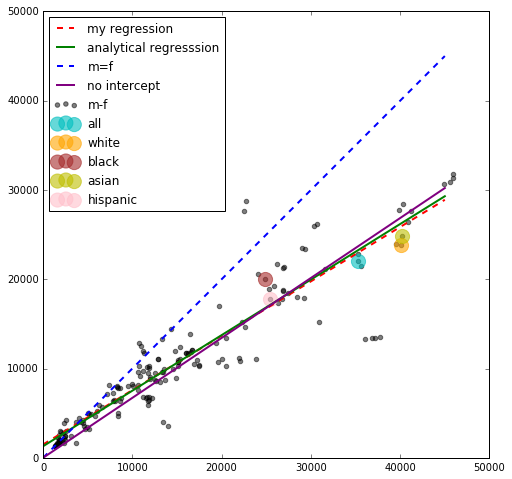

In [392]:
figsize(8,8)
pl.scatter(categories['male'],categories['female'],alpha=0.5,c='black',label='m-f')

x_n=np.arange(0,45000,1)
pl.scatter(x[0],y[0],s=200,color='c',label='all',alpha=0.6)
pl.scatter(x[1],y[1],s=200,color='orange',label='white',alpha=0.6)
pl.scatter(x[2],y[2],s=200,color='brown',label='black',alpha=0.6)
pl.scatter(x[3],y[3],s=200,color='y',label='asian',alpha=0.6)
pl.scatter(x[4],y[4],s=200,color='pink',label='hispanic',alpha=0.6)

pl.plot(x_n,x_n*predict_categories.params[1]+predict_categories.params[0],'r--',label='my regression',linewidth=2) 
pl.plot(x_n,beta0+beta1*x_n,'g-',label='analytical regresssion',linewidth=2)
pl.plot(x_n,x_n,'b--',label='m=f',linewidth=2)
pl.plot(x_n,no_intercept.params[0]*x_n,color='purple',label='no intercept',linewidth=2)
pl.xlim(0,)
pl.ylim(0,)
pl.legend(loc='best')

# FBB missing figure caption


# 6. PREDICTION


## Now pick a stipend (maybe your ideal stipend).
## and predict what a woman in a position where a man recieves your ideal stipend would make



#### use 'my regression' to predict my ideal stipend 5000 dollars

In [391]:
5000*predict_categories.params[1]+predict_categories.params[0]

4538.1420592320819

#### so a woman will make 4538 dollars if man reach 5000 dollars

# FBB such a small number is not a very good choice for this answer since near the origin the income is closer when fit by a line, and it diverges at large income

# 7. lastly do you have any comments about what these data tell us about race? 
how you would go about analyzing race differences with these data? (just a few sentences)

### 1.asian earn more than white ,and both of them more than  all
### 2.hispanic male earn more than black male, hispanic female earn more than black female

# FBB yes, but what is important is that there is a covariance between income and ethnicity that invalidates the analysis. See my solution.